Primer ensayo de visualización y limpieza de los reportes de Espeletia de Gbif  

Daniel A. Rojas Hernandez

In [1]:
import pandas as pd
from pprint import pprint

ruta = "C:/Users/danie/Documents/ESPECIALIZACION-ANALITICA/03_Analisis Geoespacial/Ocurrence_Espeletia_All.csv"
df = pd.read_csv(ruta, sep=";")  # o el método de carga que uses


In [2]:
print(df.info())     # Revisa tipos de datos y nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            39472 non-null  int64  
 1   datasetKey                        39472 non-null  object 
 2   occurrenceID                      39371 non-null  object 
 3   kingdom                           39472 non-null  object 
 4   phylum                            39472 non-null  object 
 5   class                             39472 non-null  object 
 6   order                             39472 non-null  object 
 7   family                            39472 non-null  object 
 8   genus                             39472 non-null  object 
 9   species                           36805 non-null  object 
 10  infraspecificEpithet              2683 non-null   object 
 11  taxonRank                         39472 non-null  object 
 12  scie

In [3]:
df.describe(include='all')  # Revisa estadísticos de las columnas

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
count,3.947200e+04,39472,39371,39472,39472,39472,39472,39472,39472,36805,...,16810,8741,31909,12160,30657,1155,6,20918,10396,18078
unique,NaN,237,39370,1,1,1,1,1,1,161,...,954,1860,4,637,2572,10,1,16852,2,37
top,NaN,821cc27a-e3bb-4bc5-ac34-89ada245069d,1905111B-717E-461D-B54A-69FA3FD2683F/527,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Espeletia,Espeletia grandiflora,...,"Gil-Leguizamón, P.A.",2014-09-10T00:00:00,CC_BY_NC_4_0,Parques Nacionales Naturales de Colombia,Janis Morales,Isotype,native,2025-01-31T18:01:26.336Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT
freq,NaN,6933,2,39472,39472,39472,39472,39472,39472,4406,...,2009,985,13402,3624,1344,748,6,17,10384,4691
mean,2.209069e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.132859e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.582490e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.318237e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.836149e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.090529e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como hay tantas columnas, algunas de ellas son inecesarias. Se procede a dejar solo las columnas importantes para el análisis.

In [4]:
df.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [5]:
columnas_importantes = ['decimalLongitude', 'decimalLatitude', 'genus', 'species', 'year', 'month', 'day', 
                        'eventDate', 'countryCode', 'stateProvince', 'locality', 'elevation']
df = df[columnas_importantes]  # Filtra el DataFrame para conservar solo las columnas importantes

In [6]:
print(df.isna().sum())  # Revisa los nulos en el DataFrame
df.shape

decimalLongitude    15389
decimalLatitude     15389
genus                   0
species              2667
year                 5472
month                6015
day                  8959
eventDate            5408
countryCode          1459
stateProvince        8192
locality             4243
elevation           14136
dtype: int64


(39472, 12)

In [7]:
print(f"Encontramos {df['decimalLongitude'].isna().sum()} entradas sin coordenadas en el DataFrame, las cuales se eliminarán")

Encontramos 15389 entradas sin coordenadas en el DataFrame, las cuales se eliminarán


In [8]:
df_na_coor = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])
print(df_na_coor.shape)
print(f"Conservamos {df_na_coor.shape[0]} entradas con coordenadas en el DataFrame")
df_na_coor.isna().sum()  # Revisa los nulos en el DataFrame


(24083, 12)
Conservamos 24083 entradas con coordenadas en el DataFrame


decimalLongitude       0
decimalLatitude        0
genus                  0
species             1244
year                 312
month                372
day                 2922
eventDate            268
countryCode            0
stateProvince       1074
locality            2145
elevation           7261
dtype: int64

Ahora supongamos que queremos eliminar cualquier entrada que en una de sus celdas contenga NAs

In [9]:
df_na = df.dropna()  # Elimina todas las filas con valores nulos
print(df_na.shape)
print(df_na.isna().sum() ) # Revisa nuevamente los nulos en el DataFrame
print(f"Identificamos {df_na.shape[0]} entradas sin ningun NA en el DataFrame")

(12610, 12)
decimalLongitude    0
decimalLatitude     0
genus               0
species             0
year                0
month               0
day                 0
eventDate           0
countryCode         0
stateProvince       0
locality            0
elevation           0
dtype: int64
Identificamos 12610 entradas sin ningun NA en el DataFrame


Vemos que al excluir todos los NAs la base de datos se reduce mucho. Además, hay valores faltantes en columnas que no son tan relevantes para el análisis, como la fecha de colecta. Por eso, se decide solo excluir los valores faltantes de los campos de coordenadas. 

In [10]:
df_na_coor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24083 entries, 0 to 39470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   decimalLongitude  24083 non-null  float64
 1   decimalLatitude   24083 non-null  float64
 2   genus             24083 non-null  object 
 3   species           22839 non-null  object 
 4   year              23771 non-null  float64
 5   month             23711 non-null  float64
 6   day               21161 non-null  float64
 7   eventDate         23815 non-null  object 
 8   countryCode       24083 non-null  object 
 9   stateProvince     23009 non-null  object 
 10  locality          21938 non-null  object 
 11  elevation         16822 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.4+ MB


## Visualización de los datos  
### Análisis de patrón de puntos

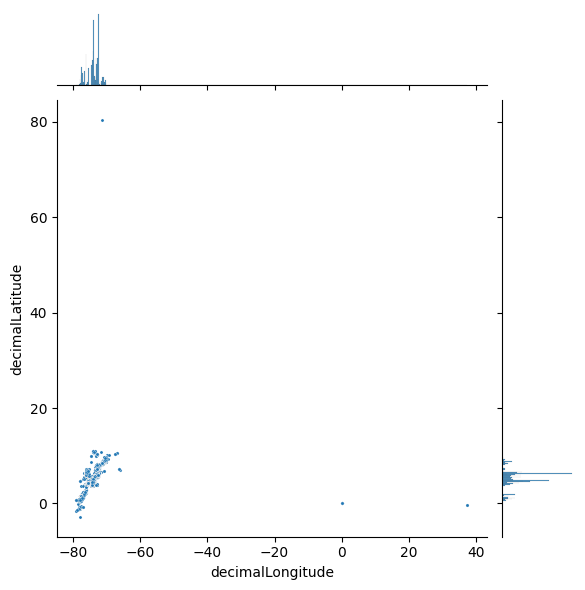

In [11]:
# Generate scatter plot
import seaborn as sbn
sbn.jointplot(x='decimalLongitude', y='decimalLatitude', data=df_na_coor, s=5.0);

Sin embargo, identificamos que hay unos valores muy por fuera de la línea de punto. Seguramente corresponden a errores de codificación de las coordenadas. 

In [12]:
df_na_coor.describe(include='all')  # Revisa estadísticos de las columnas

,decimalLongitude,decimalLatitude,genus,species,year,month,day,eventDate,countryCode,stateProvince,locality,elevation
count,24083.000000,24083.000000,24083,22839,23771.000000,23711.000000,21161.000000,23815,24083,23009,21938,16822.000000
unique,NaN,NaN,1,148,NaN,NaN,NaN,3598,3,59,3017,NaN
top,NaN,NaN,Espeletia,Espeletia grandiflora,NaN,NaN,NaN,18/03/2014,CO,Cundinamarca,Parque Nacional Natural del Cocuy,NaN
freq,NaN,NaN,24083,3205,NaN,NaN,NaN,541,21284,6019,3195,NaN
mean,-73.882561,5.194153,NaN,NaN,2005.904968,6.119649,16.209064,NaN,NaN,NaN,NaN,3406.334103
std,2.692087,2.107653,NaN,NaN,19.418601,3.202722,8.826379,NaN,NaN,NaN,NaN,336.192784
min,-78.916667,-2.816660,NaN,NaN,1760.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,-75.276979,4.528400,NaN,NaN,2007.000000,3.000000,8.000000,NaN,NaN,NaN,NaN,3260.000000
50%,-73.814610,5.411056,NaN,NaN,2014.000000,6.000000,17.000000,NaN,NaN,NaN,NaN,3430.000000
75%,-72.590306,6.347861,NaN,NaN,2016.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,3580.000000


In [13]:
print(df_na_coor[['decimalLongitude', 'decimalLatitude']].describe())

       decimalLongitude  decimalLatitude
count      24083.000000     24083.000000
mean         -73.882561         5.194153
std            2.692087         2.107653
min          -78.916667        -2.816660
25%          -75.276979         4.528400
50%          -73.814610         5.411056
75%          -72.590306         6.347861
max           37.309720        80.353000


Notamos dos cosas: Hay valores de longitud mayores que cero, lo cual no tiene sentido con la ubicación geográfica de los páramos; El valor maximo de latitud está volado, seguramente fue un error de digitalización. 

In [14]:
# Encontrar el índice de la fila con el valor más alto en 'decimalLatitude'
indice_max_lat = df_na_coor['decimalLatitude'].idxmax()

# Mostrar la fila correspondiente
fila_max_lat = df_na_coor.loc[indice_max_lat]
print(fila_max_lat)
print(fila_max_lat.locality)

decimalLongitude                                           -71.431617
decimalLatitude                                                80.353
genus                                                       Espeletia
species                                                           NaN
year                                                           2007.0
month                                                             1.0
day                                                              26.0
eventDate                                                  26/01/2007
countryCode                                                        VE
stateProvince                                                  Mérida
locality            ESTADO MÉRIDA. Municipio Sucre. | Páramo de Ch...
elevation                                                      2740.0
Name: 2742, dtype: object
ESTADO MÉRIDA. Municipio Sucre. | Páramo de Chacantá-Quirorá, arriba de Pueblo Nuevo del Sur.


In [15]:
# Sustituir el valor de 'decimalLatitude' en la fila 2742
df_na_coor.at[2742, 'decimalLatitude'] = 8.0353
df_na_coor.at[2742, 'decimalLatitude']

np.float64(8.0353)

In [16]:
# Encontrar las entradas con valores mayores a -60 de 'decimallongitude'
(df_na_coor['decimalLongitude'] > -60).sum()

np.int64(14)

In [17]:
df_na_coor[df_na_coor['decimalLongitude'] > -60]

,decimalLongitude,decimalLatitude,genus,species,year,month,day,eventDate,countryCode,stateProvince,locality,elevation
3051,0.00000,0.00,Espeletia,Espeletia figueirasii,1969.0,10.0,11.0,11/10/1969,VE,NaN,"Merida: Sierra Nevada de Santo Domingo, Paramo...",3240.0
3054,0.00000,0.00,Espeletia,Espeletia summapacis,1975.0,2.0,7.0,7/02/1975,CO,Cundinamarca,"Macizo de Sumapaz adelante de Andabobos, cerea...",3975.0
4457,0.00000,0.00,Espeletia,Espeletia glandulosa,NaN,NaN,NaN,NaN,CO,NaN,"""Cordillera Oriental",3200.0
4458,0.00000,0.00,Espeletia,Espeletia curialensis,NaN,NaN,NaN,NaN,CO,Boyaca,"""Paramo entre Chita y Secama, vertiente orient...",3350.0
4460,0.00000,0.00,Espeletia,Espeletia lopezii,1973.0,2.0,25.0,25/02/1973,CO,Boyacá,"Sierra Nevada del Cucuy, Páramo Concavo. Valle...",4335.0
4461,0.00000,0.00,Espeletia,Espeletia brachyaxiantha,NaN,NaN,NaN,NaN,CO,Boyacá,"""Páramos al NW de Belén, vereda S. José de la ...",4.0
11937,0.00000,0.00,Espeletia,Espeletia spectabilis,1972.0,11.0,18.0,18/11/1972,VE,NaN,"Edo. Mérida. Párame de San José, el Zajón del ...",1550.0
11939,0.00000,0.00,Espeletia,NaN,1968.0,7.0,2.0,2/07/1968,CO,NaN,"Depto. Boyacá,",0.0
15622,0.00000,0.00,Espeletia,Espeletia pycnophylla,1978.0,8.0,17.0,17/08/1978,EC,Carchi,Carretera el Playen - El Carmele - Panamericna...,NaN
15623,0.00000,0.00,Espeletia,Espeletia pycnophylla,1978.0,7.0,6.0,6/07/1978,EC,Carchi-Napo,Via Julio Andrade-Playon de San Francisco (Suc...,NaN


In [18]:
# Eliminar esas entradas del dataframe
print(df_na_coor.shape)
df_filt = df_na_coor[df_na_coor['decimalLongitude'] <= -60]
print(df_filt.shape)
print(f"Eliminamos {df_na_coor.shape[0] - df_filt.shape[0]} entradas del DataFrame")

(24083, 12)
(24069, 12)
Eliminamos 14 entradas del DataFrame


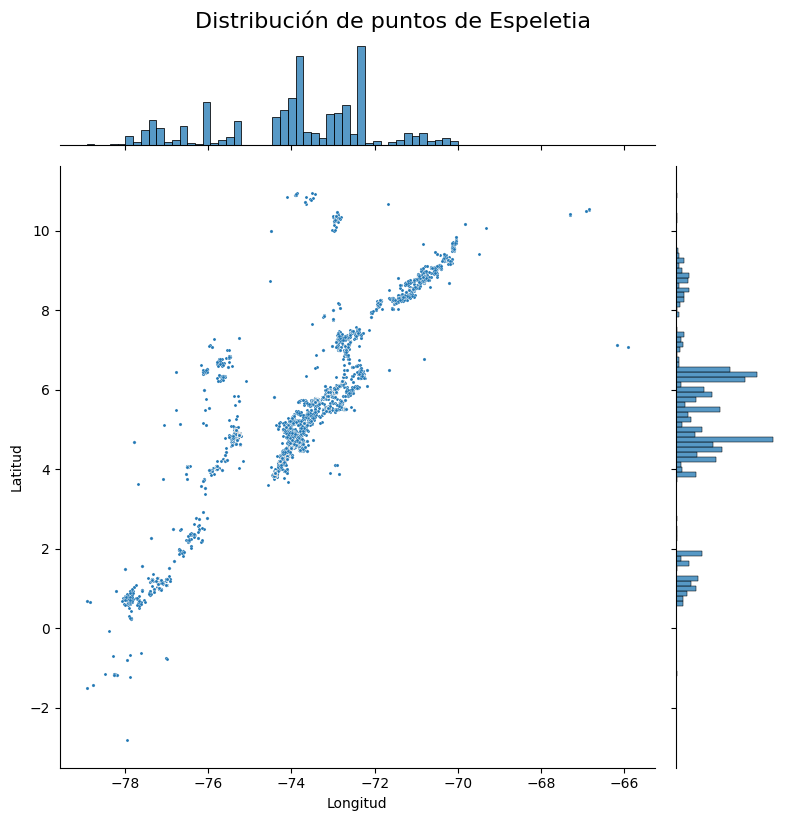

In [19]:
# Generate scatter plot
import seaborn as sbn
import matplotlib.pyplot as plt

plot = sbn.jointplot(
    x='decimalLongitude', 
    y='decimalLatitude', 
    data=df_filt, 
    s=5,  # Tamaño de los puntos
    height=8
)

# Agregar título y etiquetas
plot.fig.suptitle("Distribución de puntos de Espeletia", y=1.02, fontsize=16)
plot.set_axis_labels("Longitud", "Latitud")

plt.show()

In [ ]:
# Guardar el DataFrame filtrado en un nuevo archivo CSV
#df_filt.to_csv("C:/Users/danie/Documents/ESPECIALIZACION-ANALITICA/03_Analisis Geoespacial/Ocurrence_Espeletia_All_Filt.csv", sep=",", index=False)

In [21]:
# Guardamos un dataframe a parte para las entradas sin elevación
# Filtrar los datos sin elevación
sin_elevacion = df_filt[df_filt['elevation'].isna()]
sin_elevacion.shape

# Guardar los datos sin elevación en un archivo CSV para análisis adicional (opcional)
#sin_elevacion.to_csv("C:/Users/danie/Documents/ESPECIALIZACION-ANALITICA/03_Analisis Geoespacial/datos_sin_elevacion.csv", index=False, sep=";")

(7257, 12)

In [22]:
sin_elevacion.columns

Index(['decimalLongitude', 'decimalLatitude', 'genus', 'species', 'year',
       'month', 'day', 'eventDate', 'countryCode', 'stateProvince', 'locality',
       'elevation'],
      dtype='object')

In [34]:
import pandas as pd

elevacion = pd.read_csv("C:/Users/danie/Documents/ESPECIALIZACION-ANALITICA/03_Analisis Geoespacial/Prueba_elevacion.txt", sep="\t")
elevacion.shape

(2386, 17)

In [24]:
# ¿Qué entradas tenemos de Colombia?
df_na_col = df_na_coor[df_na_coor['countryCode'] == 'CO']
print(df_na_col.shape)
print(f"Tenemos {df_na_col.shape[0]} entradas de Colombia en el DataFrame")

(21284, 12)
Tenemos 21284 entradas de Colombia en el DataFrame


### Incluimos las observaciones de NCBI con lecturas genómicas

In [25]:
import pandas as pd

genMeta = pd.read_csv("C:/Users/danie/Documents/Reads_Espeletia/MetaData_Espeletia_short.csv", sep=";")
print(genMeta.info())     # Revisa tipos de datos y nulos
print(genMeta.describe(include='all'))  # Revisa estadísticos de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Run                              83 non-null     object 
 1   Collection_Date                  83 non-null     object 
 2   environment_(biome)              83 non-null     object 
 3   environment_(feature)            83 non-null     object 
 4   environment_(material)           83 non-null     object 
 5   Experiment                       83 non-null     object 
 6   external_id                      83 non-null     object 
 7   geo_loc_name_country             83 non-null     object 
 8   geographic_location_(latitude)   83 non-null     float64
 9   geographic_location_(longitude)  83 non-null     float64
 10  Organism                         83 non-null     object 
 11  Sample Name                      83 non-null     object 
 12  Sample_name             

In [26]:
print(genMeta.geo_loc_name_country)

0     Venezuela
1     Venezuela
2     Venezuela
3     Venezuela
4     Venezuela
        ...    
78    Venezuela
79    Venezuela
80    Venezuela
81     Colombia
82     Colombia
Name: geo_loc_name_country, Length: 83, dtype: object


Deseamos unir los dataframes 'genMeta' y 'df_filt' en un solo dataframe  
  
Para esto los dataframes deben tener al menos una columna en común

In [27]:
print(df_filt.genus)
print(genMeta.columns)
genMeta.Organism

0        Espeletia
1        Espeletia
2        Espeletia
3        Espeletia
4        Espeletia
           ...    
39466    Espeletia
39467    Espeletia
39468    Espeletia
39469    Espeletia
39470    Espeletia
Name: genus, Length: 24069, dtype: object
Index(['Run', 'Collection_Date', 'environment_(biome)',
       'environment_(feature)', 'environment_(material)', 'Experiment',
       'external_id', 'geo_loc_name_country', 'geographic_location_(latitude)',
       'geographic_location_(longitude)', 'Organism', 'Sample Name',
       'Sample_name'],
      dtype='object')


0               Espeletia angustifolia
1             Espeletia aristeguietana
2               Espeletia atropurpurea
3                   Espeletia badilloi
4     Espeletia badilloi var. pittieri
                    ...               
78                    Espeletia tamana
79                Espeletia hanburyana
80                Espeletia hanburyana
81                  Espeletia cardonae
82                  Espeletia cardonae
Name: Organism, Length: 83, dtype: object

In [28]:
print(df_filt.shape)
(df_filt['genus'] == 'Espeletia').sum()

(24069, 12)


np.int64(24069)

In [29]:
# Creamos nueva columnas llamada 'genus' donde todo sea Espeletia
genMeta['genus'] = 'Espeletia'
print(genMeta.shape)
(genMeta['genus'] == 'Espeletia').sum()

(83, 14)


np.int64(83)

In [30]:
columnas_importantes = ['geo_loc_name_country', 'geographic_location_(latitude)',
       'geographic_location_(longitude)', 'Organism', 'Sample Name',
       'Sample_name', 'genus']
Meta = genMeta[columnas_importantes] 
Meta.shape

(83, 7)

In [31]:
Meta = Meta.rename(columns={
    'geographic_location_(longitude)': 'decimalLongitude',
    'geographic_location_(latitude)': 'decimalLatitude'
})

# Verifica los cambios
print(Meta.columns)
print(df_filt.columns)

Index(['geo_loc_name_country', 'decimalLatitude', 'decimalLongitude',
       'Organism', 'Sample Name', 'Sample_name', 'genus'],
      dtype='object')
Index(['decimalLongitude', 'decimalLatitude', 'genus', 'species', 'year',
       'month', 'day', 'eventDate', 'countryCode', 'stateProvince', 'locality',
       'elevation'],
      dtype='object')


In [32]:
# df_merged = pd.merge(df_filt, Meta, on='genus', how='inner')
# print(df_merged.shape)